In [ ]:
import xarray as xr
import xgcm
import numpy as np
import xroms
import matplotlib.pyplot as plt

### Load in data

More information at in [input/output notebook](io.ipynb)

In [ ]:
nc = xr.open_dataset(url)

In [ ]:
# Helpful to have local file for this
url = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'

ds = xr.open_dataset(url)
ds

## Built-in Physical Calculations

These are all properties of the accessor, so should be called without (). Demostrated below are the calculations using the accessor and not using the accessor.

### Density

In [23]:
rho = xroms.density(ds.temperature, ds.salinity, ds.depth)

/home/florianb/miniconda3/envs/XROMS/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/florianb/miniconda3/envs/XROMS/lib/python3.8/site-packages/xarray/core/dataarray.py:780: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


In [49]:
rho

<xarray.DataArray 'rho' (time: 24, depth: 16, Y: 902, X: 2602)>
array([[[[          nan,           nan,           nan, ...,
          1027.00866699, 1027.00793457, 1027.00366211],
         [          nan,           nan,           nan, ...,
          1027.00512695, 1027.00439453, 1027.00366211],
         [          nan,           nan,           nan, ...,
          1027.00610352, 1027.00512695, 1027.00512695],
         ...,
         [1026.37561035, 1026.39025879, 1026.39111328, ...,
          1027.15783691, 1027.15393066, 1027.15087891],
         [1026.37475586, 1026.38867188, 1026.3894043 , ...,
          1027.15942383, 1027.15551758, 1027.15002441],
         [1026.38085938, 1026.38500977, 1026.38574219, ...,
          1027.15930176, 1027.15527344, 1027.15222168]],

        [[          nan,           nan,           nan, ...,
          1026.9907038 , 1026.98997136, 1026.98997136],
         [          nan,           nan,           nan, ...,
          1026.99143625, 1026.9907038 , 1026.98997136],
         [          nan,           nan,           nan, ...,
          1026.99241283, 1026.99143625, 1026.99143625],
...
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]],

        [[          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         ...,
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]]]])
Coordinates:
  * X        (X) float64 0.0 800.0 1.6e+03 ... 2.079e+06 2.08e+06 2.081e+06
  * Y        (Y) float64 0.0 800.0 1.6e+03 ... 7.192e+05 7.2e+05 7.208e+05
  * depth    (depth) float64 0.0 3.0 10.0 15.0 25.0 ... 500.0 1e+03 2e+03 3e+03
  * time     (time) datetime64[ns] 2019-07-16 ... 2019-07-16T23:00:00
    lat      (Y, X) float64 55.91 55.91 55.92 55.93 ... 75.3 75.3 75.31 75.32
    lon      (Y, X) float64 9.195 9.201 9.207 9.213 ... 23.65 23.67 23.69 23.71
Attributes:
    units:          kg/m^3
    time:           ocean_time
    grid:           grid
    location:       face
    field:          temperature, scalar, series
    grid_mapping:   projection_stere
    long_name:      density
    standard_name:  sea_water_potential_temperature
    _ChunkSizes:    [   1    1   17 2602]
    name:           rho

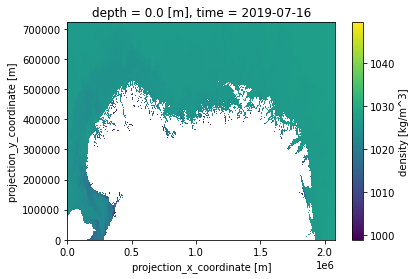

In [48]:
rho.isel(time=0, depth=0).plot()

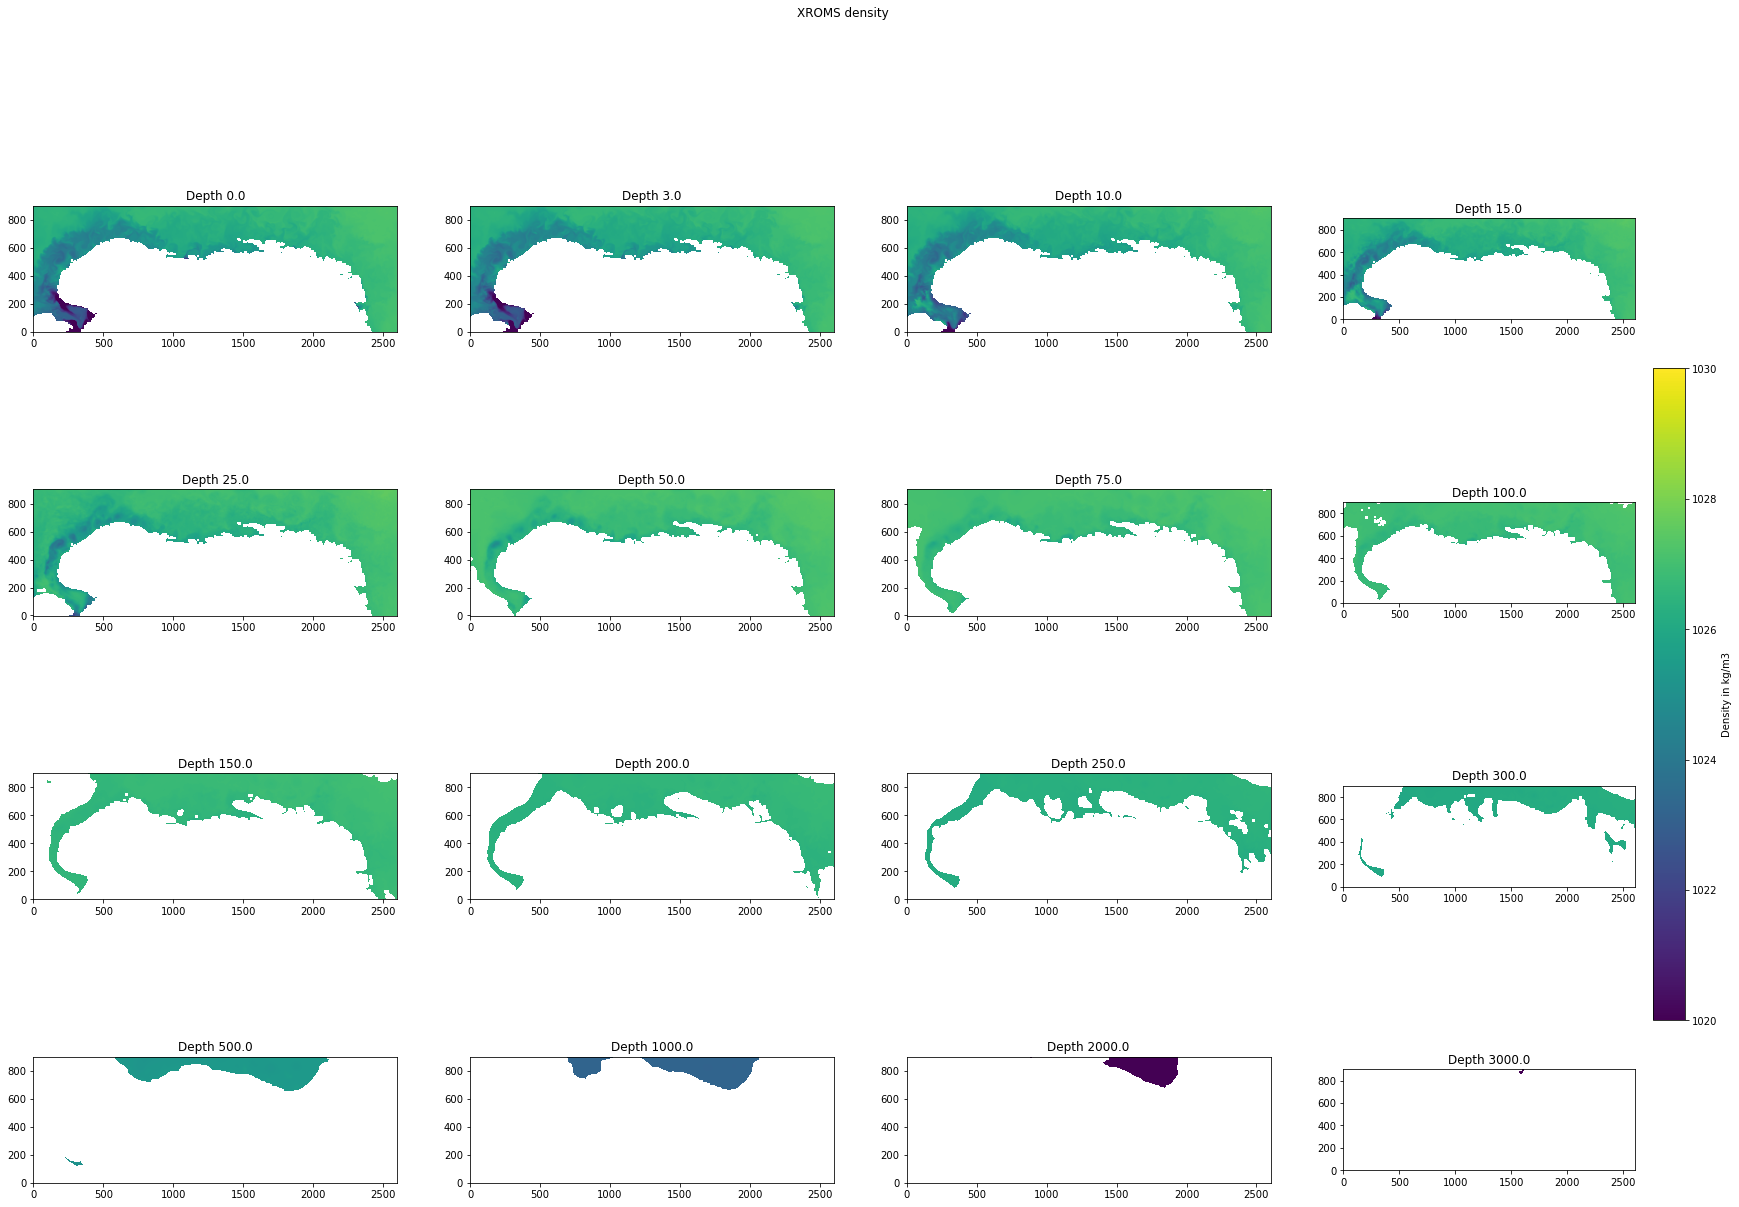

In [86]:
figX, figY = 4,4
fig, axs = plt.subplots(figX,figY, figsize=(30,20))
for i in range(figY):
    for j in range(figX):
        im = axs[i,j].imshow(rho[0][i*figX+j], origin="lower", vmin=1020, vmax=1030)
        axs[i,j].set_title("Depth " + str(ds.depth[i*figX+j].data.item()))
cbar = fig.colorbar(im, ax=axs[:,-1], shrink = 0.6)
cbar.set_label("Density in kg/m3")
fig.suptitle("XROMS density")
plt.show()